In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv('C:/Users/19874/OneDrive/桌面/logistic_regression_data.csv')
print(df.head())

    x1   x2  y
0  0.5  2.3  0
1  1.2  5.6  0
2  2.9  7.8  1
3  3.5  3.9  1
4  5.3  2.1  1


In [3]:
X = df[['x1','x2']]
print(X)
y = df['y']
print(y)

     x1   x2
0   0.5  2.3
1   1.2  5.6
2   2.9  7.8
3   3.5  3.9
4   5.3  2.1
5   2.3  1.9
6   3.3  7.5
7   1.7  0.3
8   1.3  4.2
9   1.6  7.5
10  0.7  5.2
11  5.9  3.1
12  4.3  2.3
13  3.2  1.7
14  3.7  6.7
15  5.5  6.1
16  4.6  5.1
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     0
9     0
10    0
11    1
12    1
13    0
14    1
15    1
16    1
Name: y, dtype: int64


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,x1,x2
1,1.2,5.6
4,5.3,2.1
15,5.5,6.1
9,1.6,7.5
16,4.6,5.1
6,3.3,7.5
5,2.3,1.9
2,2.9,7.8
3,3.5,3.9
7,1.7,0.3


In [5]:
y_train

1     0
4     1
15    1
9     0
16    1
6     1
5     0
2     1
3     1
7     0
11    1
8     0
13    0
Name: y, dtype: int64

In [6]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [7]:
y_pred = model.predict(X_test)
print(y_pred)
model.predict_proba(X_test)

[0 0 1 1]


array([[0.71548264, 0.28451736],
       [0.69209094, 0.30790906],
       [0.2218515 , 0.7781485 ],
       [0.28748673, 0.71251327]])

Text(0, 0.5, 'y')

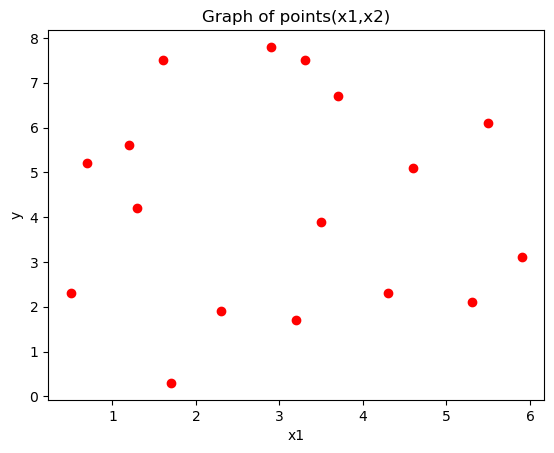

In [8]:
plt.scatter(df['x1'], df['x2'],color='red')
plt.title('Graph of points(x1,x2)')
plt.xlabel('x1')
plt.ylabel('y')

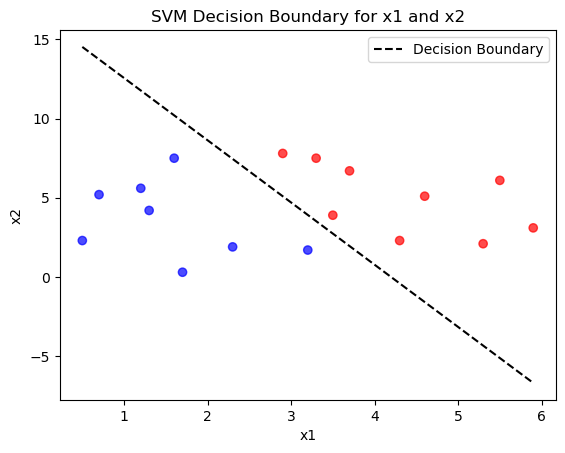

In [9]:
from sklearn.svm import SVC

# Training an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(df[['x1', 'x2']], df['y'])

# Extracting the coefficients (w) and intercept (b) for the decision boundary
w = svm_model.coef_[0]
b = svm_model.intercept_[0]

# Calculate the slope and intercept for the decision boundary line
slope = -w[0] / w[1]
intercept = -b / w[1]

# Generating a range of x values and their corresponding y values for the decision boundary line
x_values = np.linspace(df['x1'].min(), df['x1'].max(), 100)
y_values = slope * x_values + intercept

# Plot the scatter plot and decision boundary
plt.scatter(df['x1'], df['x2'], c=df['y'], cmap='bwr', alpha=0.7)
plt.plot(x_values, y_values, color='black', linestyle='--', label='Decision Boundary')
plt.title('SVM Decision Boundary for x1 and x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()
